In [36]:
%load_ext autoreload
%autoreload 2
import numpy as np # math
import matplotlib.pyplot as plt # graphs and plots
import pandas as pd
from tqdm import tqdm
import datetime
import matplotlib.dates as mdates
from src.utils.profiles_from_schedule_new import SimParam # class for show-up generator
from src.simfunc.KIX_T1d_CUSBD_new import Pax, Simulation , minutes_to_hms# classes for simulation
import seaborn as sns


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
simparam = SimParam()
path_to_6k_sched = (
    r"/home/antoine/projects/"
    "KAPpaxsim/data/"
    "processed/Schedule (30th terminal peak, 6000 pax)_PROCESSED.xlsx"
)
simparam.schedule_from_path(path_to_6k_sched)
simparam.schedule_cleanup()
simparam.schedule_filter()
simparam.show_up_from_file()
simparam.assign_flight_show_up_category_default()
# simparam.plot_show_up_categories_profiles()
# simparam.schedule['PAX_SUM FC'] = 10
simparam.assign_show_up()
# simparam.plot_df_Pax()
simparam.assign_check_in()

In [125]:
# simparam.df_Counters['total'].plot()

In [131]:
simparam.dct_resource = {
    'kiosk' : 92,
    'security' : 200,
    'CUSBD' : 50,
}

simparam.dct_processes = {
    'kiosk' : 70,
    'security': 1,
    'CUSBD': 60,
    'checkin': 70,
}

mask_CUSBD = simparam.df_Pax['Airline']=='NEW'
simparam.df_Pax.loc[mask_CUSBD,'pax_type']='CUSBD'

mask_tradi = mask_CUSBD == False
simparam.df_Pax.loc[mask_tradi,'pax_type']='tradi'

# Need to make a pretty control for :
#     - pax types from simparam.df_Pax
#     - pax journeys by pax types
#     - plotting process list_all
#     - FREQ and WIN
#     - how long before STD pax should wait
# maybe store the processes sequence in df_Pax and go from there?

In [132]:
simparam.df_Pax.columns

Index(['Flight Number', 'time', 'Scheduled Time', 'Category', 'Pax', 'minutes',
       'Airline', 'pax_type'],
      dtype='object')

In [133]:
simulation = Simulation(simparam)
simulation.generate_checkin()
simulation.generate_pax()
simulation.run(end_time=1440)

Simulation running...: 100%|██████████| 1439/1439 [02:47<00:00,  8.57it/s] 


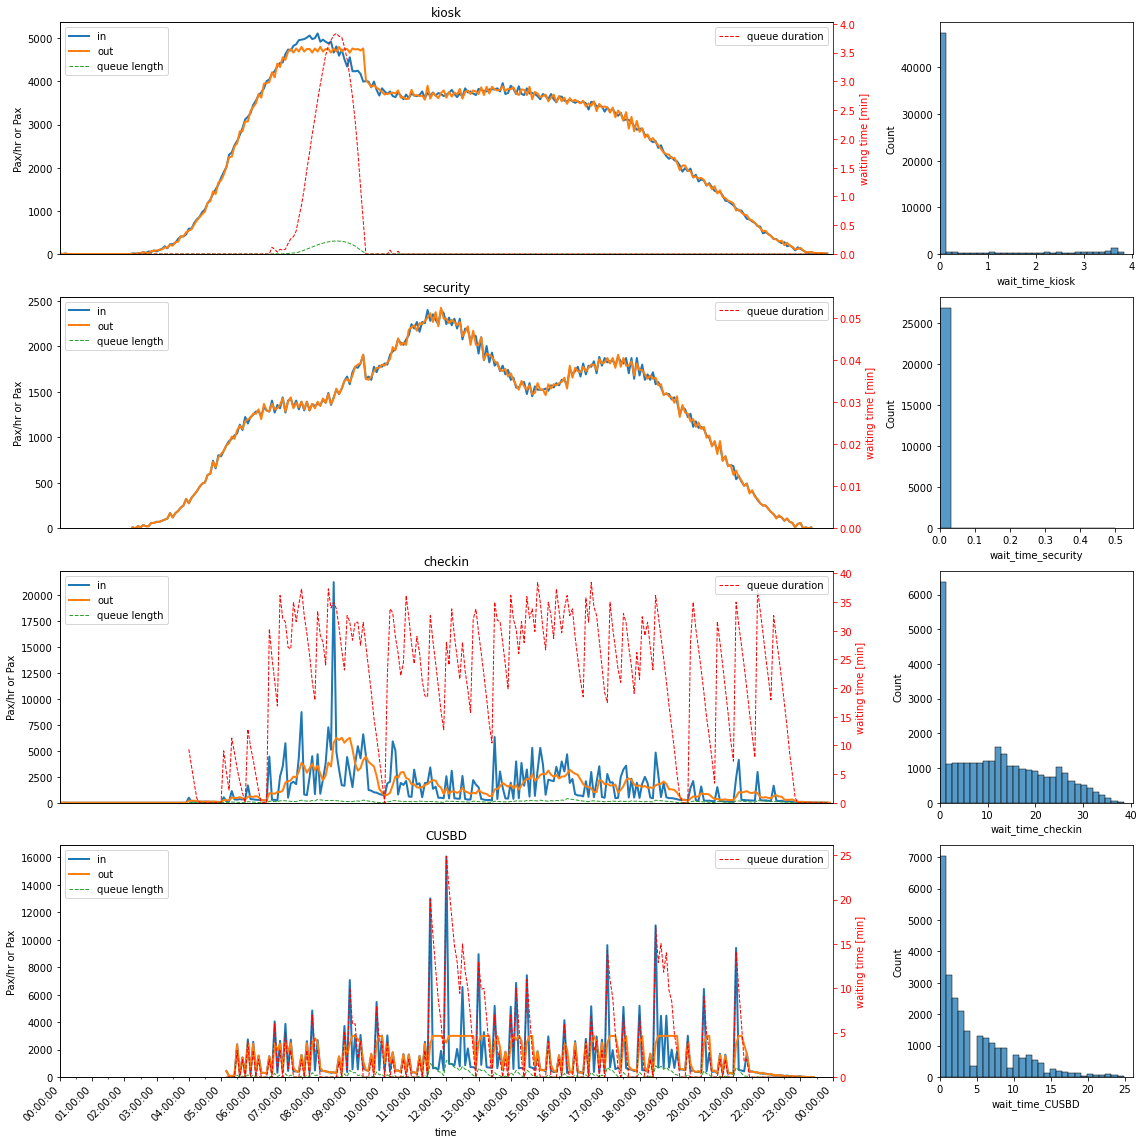

In [134]:
simulation.format_df_result()
simulation.plot_result()

In [135]:
simulation.format_df_result(filter_airline='NEW')
simulation.plot_result()

AttributeError: 'NaTType' object has no attribute 'tz'

In [ ]:
simulation.df_result.sort_values(by=['wait_time_checkin'],ascending=False)

,Flight Number,time,Scheduled Time,Category,Pax,minutes,pax_type,kiosk_queue_length,start_kiosk_queue,end_kiosk_queue,end_kiosk_process,checkin_queue_length,start_checkin_queue,end_checkin_queue,end_checkin_process,Airline,wait_time_kiosk,wait_time_checkin
21245,UAL 34,2020-10-13 14:48:36,2020-10-13 17:20:00,FSC,1,888.6,tradi,0,2020-10-13 14:48:36,2020-10-13 14:48:36,2020-10-13 14:49:45,161,2020-10-13 14:50:00,2020-10-13 15:28:29,2020-10-13 15:29:39,UAL,0 days 00:00:00,0 days 00:38:29
25323,CAL 173,2020-10-13 16:28:53,2020-10-13 19:00:00,FSC,1,988.883333,tradi,0,2020-10-13 16:28:52,2020-10-13 16:28:52,2020-10-13 16:30:02,193,2020-10-13 16:30:02,2020-10-13 17:08:29,2020-10-13 17:09:39,CAL,0 days 00:00:00,0 days 00:38:27
21246,UAL 34,2020-10-13 14:49:24,2020-10-13 17:20:00,FSC,1,889.4,tradi,0,2020-10-13 14:49:23,2020-10-13 14:49:23,2020-10-13 14:50:33,162,2020-10-13 14:50:33,2020-10-13 15:28:29,2020-10-13 15:29:39,UAL,0 days 00:00:00,0 days 00:37:56
25324,CAL 173,2020-10-13 16:29:33,2020-10-13 19:00:00,FSC,1,989.55,tradi,0,2020-10-13 16:29:32,2020-10-13 16:29:32,2020-10-13 16:30:42,194,2020-10-13 16:30:42,2020-10-13 17:08:29,2020-10-13 17:09:39,CAL,0 days 00:00:00,0 days 00:37:47
4054,CAL 159,2020-10-13 07:27:38,2020-10-13 10:00:00,FSC,1,447.633333,tradi,33,2020-10-13 07:27:37,2020-10-13 07:27:59,2020-10-13 07:29:09,187,2020-10-13 07:30:00,2020-10-13 08:07:20,2020-10-13 08:08:30,CAL,0 days 00:00:22,0 days 00:37:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35477,NEW 026,2020-10-13 13:55:20,2020-10-13 16:00:00,FSC,1,835.333333,tradi,0,2020-10-13 13:55:20,2020-10-13 13:55:20,2020-10-13 13:56:30,0,2020-10-13 13:56:30,2020-10-13 13:56:30,2020-10-13 13:57:39,NEW,0 days 00:00:00,0 days 00:00:00
35476,NEW 026,2020-10-13 13:54:24,2020-10-13 16:00:00,FSC,1,834.4,tradi,0,2020-10-13 13:54:23,2020-10-13 13:54:23,2020-10-13 13:55:33,0,2020-10-13 13:55:33,2020-10-13 13:55:33,2020-10-13 13:56:43,NEW,0 days 00:00:00,0 days 00:00:00
35475,NEW 026,2020-10-13 13:53:29,2020-10-13 16:00:00,FSC,1,833.483333,tradi,0,2020-10-13 13:53:29,2020-10-13 13:53:29,2020-10-13 13:54:38,0,2020-10-13 13:54:38,2020-10-13 13:54:38,2020-10-13 13:55:48,NEW,0 days 00:00:00,0 days 00:00:00
35474,NEW 026,2020-10-13 13:52:34,2020-10-13 16:00:00,FSC,1,832.566667,tradi,0,2020-10-13 13:52:34,2020-10-13 13:52:34,2020-10-13 13:53:44,0,2020-10-13 13:53:44,2020-10-13 13:53:44,2020-10-13 13:54:53,NEW,0 days 00:00:00,0 days 00:00:00
